In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt

Every ad has a certain probability of getting clicked.

In [2]:
df=pd.read_csv("/kaggle/input/adsctr/Ads_CTR_Optimisation.csv")
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


We need to select ads with high probability of getting clicked.

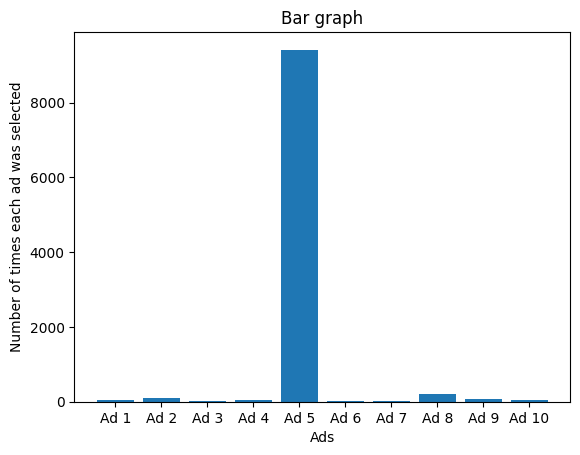

In [7]:
N = 10000
d = 10

ads_selected = []
successes = [0] * d
failures = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_beta = 0
    for i in range(0,d):
        random_beta=random.betavariate(successes[i]+1,failures[i]+1)
        if random_beta>max_beta:
            max_beta=random_beta
            ad=i
    ads_selected.append(ad+1)
    reward = df.values[n, ad]
    if reward==1:
          successes[ad] = successes[ad] + 1
    else:
           failures[ad] = failures[ad] + 1
    total_reward += reward

# Plotting
x = []
y = []
for i in range(1,11):
    x.append("Ad "+str(i))
    y.append(ads_selected.count(i))

plt.bar(x, y)
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.title('Bar graph')
plt.show()

In [8]:
df.sum()

Ad 1     1703
Ad 2     1295
Ad 3      728
Ad 4     1196
Ad 5     2695
Ad 6      126
Ad 7     1112
Ad 8     2091
Ad 9      952
Ad 10     489
dtype: int64

In [9]:
total_reward

2601